# L'evoluzione dei temi cinematografici nel corso del tempo

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Ottiene la directory di lavoro corrente
script_dir = os.getcwd()

# Cartella dove si trovano i file CSV (modifica con il percorso corretto)
clean_path = os.path.join(script_dir, "Data", "clean_data")

# Caricamento dei dataset con percorsi dinamici
actors = pd.read_csv(os.path.join(clean_path, "actors_cleaned.csv"))
countries = pd.read_csv(os.path.join(clean_path, "countries_cleaned.csv"))
crew = pd.read_csv(os.path.join(clean_path, "crew_cleaned.csv"))
genres = pd.read_csv(os.path.join(clean_path, "genres_cleaned.csv"))
languages = pd.read_csv(os.path.join(clean_path, "languages_cleaned.csv"))
movies = pd.read_csv(os.path.join(clean_path, "movies_cleaned.csv"))
posters = pd.read_csv(os.path.join(clean_path, "posters_cleaned.csv"))
releases = pd.read_csv(os.path.join(clean_path, "releases_cleaned.csv"))
studios = pd.read_csv(os.path.join(clean_path, "studios_cleaned.csv"))
themes = pd.read_csv(os.path.join(clean_path, "themes_cleaned.csv"))
oscar_awards = pd.read_csv(os.path.join(clean_path, "the_oscar_awards_cleaned.csv"))
rotten_tomatoes = pd.read_csv(os.path.join(clean_path, "rotten_tomatoes_reviews_cleaned.csv"))


## Qual è la distribuzione dei temi nei diversi decedenni?

Quali temi erano predominanti in certe epoche?

<Figure size 1600x800 with 0 Axes>

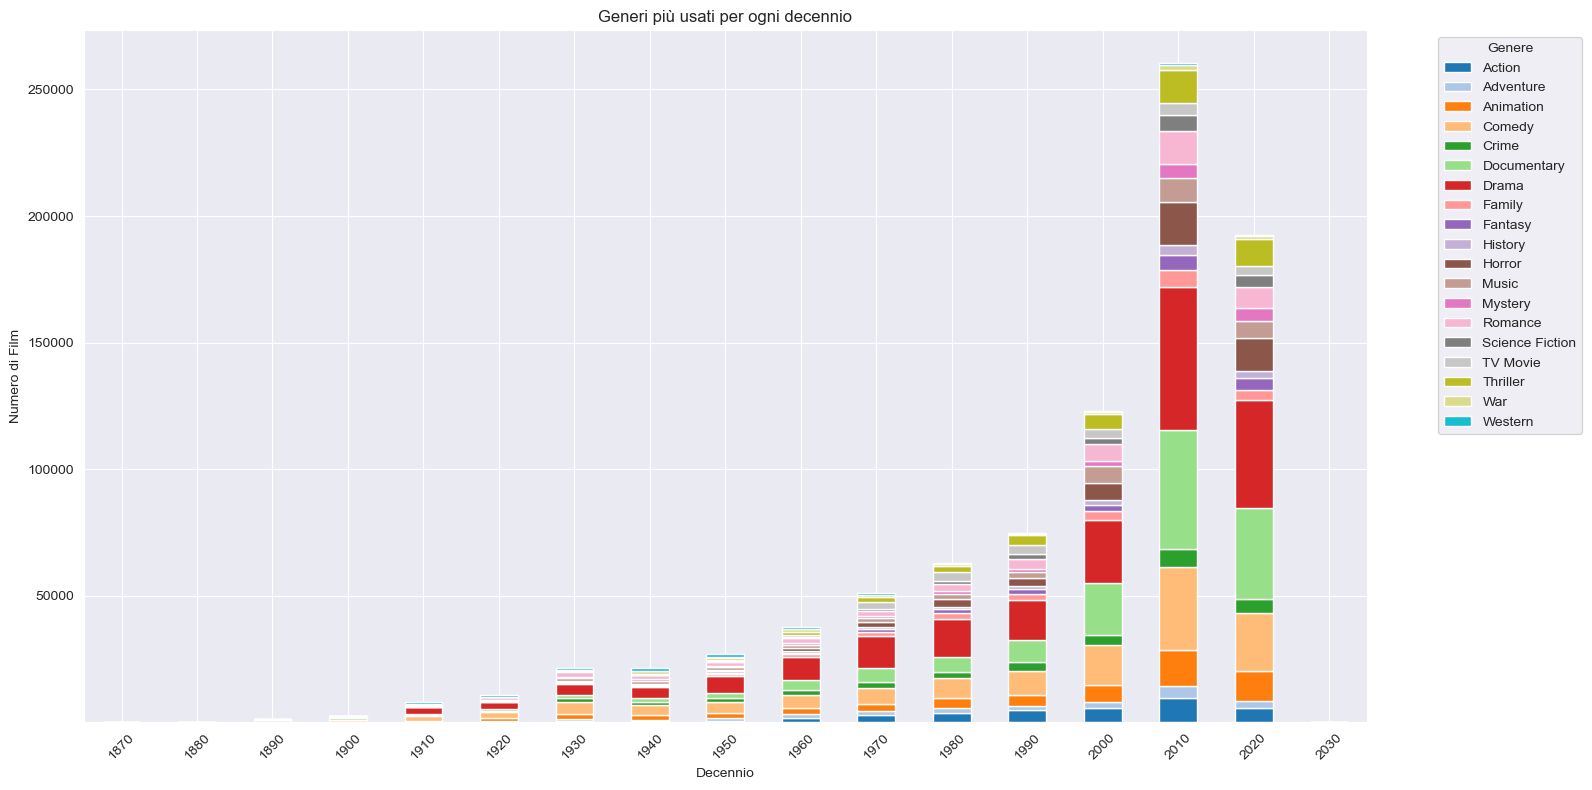

In [86]:
# Creiamo una colonna 'decade' raggruppando gli anni per decennio
movies['decade'] = (movies['date'] // 10) * 10

# Uniamo i dati dei generi con i film
genre_decade = pd.merge(movies, genres, left_on='id', right_on='id', how='inner')

# Conta i generi per decennio
decade_genre_count = genre_decade.groupby(['decade', 'genre']).size().unstack(fill_value=0)

# Imposta una palette di colori con Seaborn
num_genres = len(decade_genre_count.columns)  # Numero di generi distinti
palette = sns.color_palette("tab20", num_genres)  # Puoi provare anche 'Set3', 'husl', 'coolwarm'

# Grafico dei generi per decennio con colori diversi
plt.figure(figsize=(16, 8))
decade_genre_count.plot(kind='bar', stacked=True, figsize=(16, 8), color=palette, legend=True)

plt.title('Generi più usati per ogni decennio')
plt.xlabel('Decennio')
plt.ylabel('Numero di Film')
plt.xticks(rotation=45)  # Ruotiamo leggermente le etichette dei decenni per leggibilità
plt.legend(title='Genere', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fuori dal grafico
plt.tight_layout()
plt.show()


"Come si può osservare dal grafico, nei primi decenni del cinema pochi generi dominavano il panorama. Il genere Drama è sempre stato uno dei più presenti, mentre Comedy ha riscosso grande successo, soprattutto nei primi decenni, anche se la sua crescita è stata più lenta tra il 1940 e il 1990. Negli ultimi anni, in particolare negli anni '10 del 2000, si è registrato un aumento significativo del genere Documentary, probabilmente grazie all'avvento di nuove tecnologie che hanno reso possibili scene e narrazioni prima impensabili. In questo periodo, si osserva anche una crescita esponenziale nella produzione di film, con un'espansione dei generi, alcuni dei quali erano poco rappresentati fino a quel momento.

# Come sono cambiati i temi principali nei film premiati con l'Oscar?


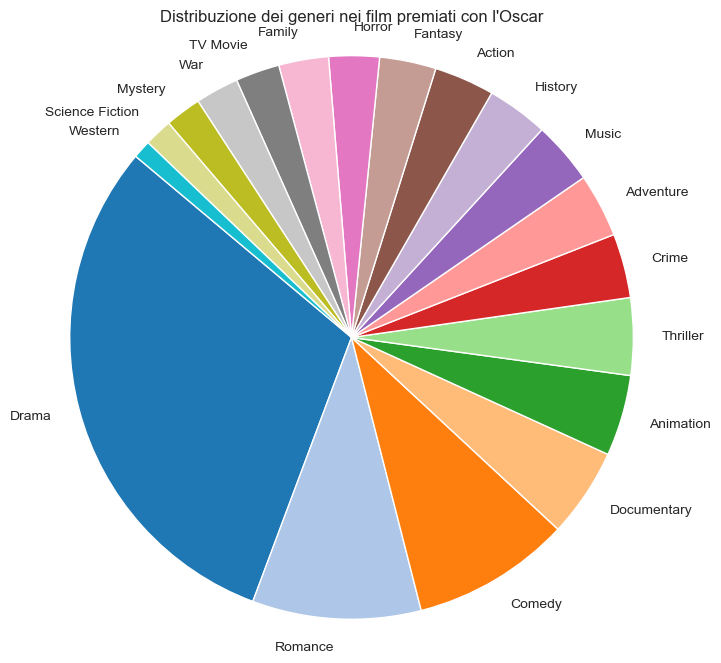

In [95]:
# Unisci i dati per ottenere il nome del film e il genere
oscars_with_movies = oscar_awards.merge(movies, left_on='film', right_on='name', how='inner')

# Unisci i dati con il dataframe dei generi
oscars_with_genres = oscars_with_movies.merge(genres, left_on='id', right_on='id', how='inner')

# Conta la frequenza di ogni genere nei film premiati con l'Oscar
genre_counts = oscars_with_genres['genre'].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, colors=plt.cm.tab20.colors, startangle=140)
plt.title('Distribuzione dei generi nei film premiati con l\'Oscar')
plt.axis('equal')  # Per mantenere la forma circolare
plt.show()

Il genere Drama non è solo quello più rappresentato nel panorama cinematografico, ma anche il più premiato con l'Oscar. Nonostante la popolarità del genere Comedy, che ha una lunga tradizione nel cinema, è stato superato dal Romance in termini di premi ricevuti durante la cerimonia degli Oscar. Sebbene il genere Documentary conti numerosi film, non ha visto un equivalente successo durante la notte degli Oscar, risultando meno premiato rispetto ad altri generi.

# Candidature e vittorie del genere Drama

Abbiamo visto che il genere Drama è da sempre il più diffuso. Concentriamoci sulle candidature e sulle vittorie di questo genere durante la notte degli Oscar.

Candidature per decennio:
 decade
1920     45
1930    213
1940    350
1950    288
1960    279
1970    274
1980    284
1990    324
2000    307
2010    363
2020    126
Name: film, dtype: int64
Vittorie per decennio:
 decade
1920     15
1930     70
1940     95
1950     82
1960     78
1970     86
1980     83
1990     88
2000     92
2010    111
2020     34
Name: film, dtype: int64


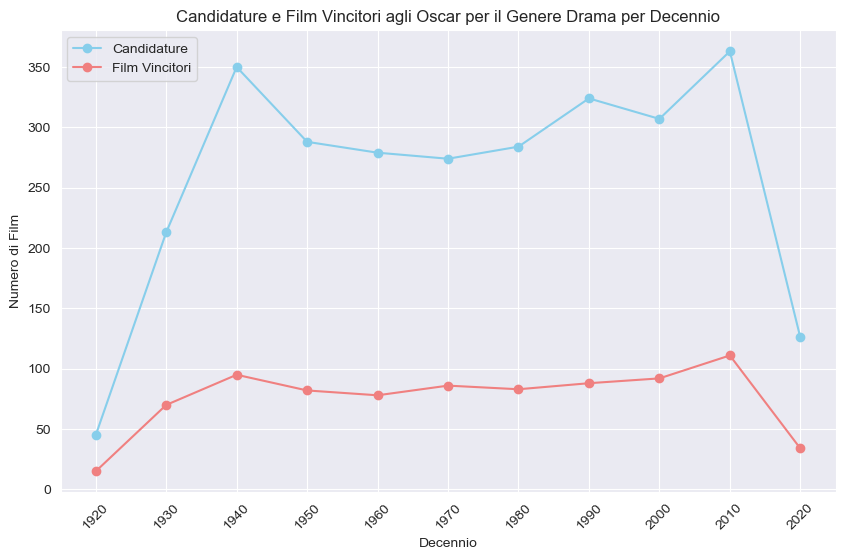

In [111]:
# Unisci i dati per ottenere i generi dei film
movies_with_genres = movies.merge(genres, left_on='id', right_on='id', how='inner')

# Filtra i film di genere 'Drama'
drama_movies = movies_with_genres[movies_with_genres['genre'] == 'Drama']

# Filtra i dati degli Oscar per film di genere 'Drama'
oscars_with_drama = oscar_awards.copy()
oscars_with_drama = oscars_with_drama[oscars_with_drama['film'].isin(drama_movies['name'])]

# Converti winner in booleano (alcuni dataset usano True/False invece di 'yes'/'no')
oscars_with_drama['winner'] = oscars_with_drama['winner'].astype(bool)

# Creiamo una colonna 'decade' per il decennio
oscars_with_drama['decade'] = (oscars_with_drama['year_film'] // 10) * 10

# Conta il numero di candidature per decennio (conta tutte le nomination)
candidature_per_decennio = oscars_with_drama.groupby('decade')['film'].nunique()

# Conta il numero di film Drama che hanno vinto almeno un Oscar per decennio
vittorie_per_decennio = (
    oscars_with_drama[oscars_with_drama['winner']]
    .groupby('decade')['film']
    .nunique()  # Conta i film unici vincitori
)

# Troviamo tutti i decenni nel dataset per assicurarci che non ne manchino
tutti_i_decenni = range(oscars_with_drama['decade'].min(), oscars_with_drama['decade'].max() + 10, 10)

# Riempie i valori mancanti con 0
candidature_per_decennio = candidature_per_decennio.reindex(tutti_i_decenni, fill_value=0)
vittorie_per_decennio = vittorie_per_decennio.reindex(tutti_i_decenni, fill_value=0)

# Debug: Stampa i dati per verificare che non siano vuoti
print("Candidature per decennio:\n", candidature_per_decennio)
print("Vittorie per decennio:\n", vittorie_per_decennio)

# Creazione del grafico
plt.figure(figsize=(10, 6))

# Linea candidature
plt.plot(candidature_per_decennio.index, candidature_per_decennio.values, label='Candidature', marker='o', color='skyblue')

# Linea vittorie (film con almeno una vittoria)
plt.plot(vittorie_per_decennio.index, vittorie_per_decennio.values, label='Film Vincitori', marker='o', color='lightcoral')

# Aggiungere titoli ed etichette
plt.title('Candidature e Film Vincitori agli Oscar per il Genere Drama per Decennio')
plt.xlabel('Decennio')
plt.ylabel('Numero di Film')
plt.legend()
plt.grid(True)
plt.xticks(tutti_i_decenni, rotation=45)  # Ruota le etichette per migliorare la leggibilità

# Mostra il grafico
plt.show()


Si osserva un netto incremento delle candidature dal 1920 al 1940, raggiungendo il picco negli anni '40.
Dopo una leggera flessione tra gli anni '50 e '70, le candidature riprendono a salire fino al 2010.
Dopo il 2010, si nota un calo significativo nel numero di candidature nel 2020. L'andamento delle vittorie segue una tendenza simile alle candidature, con una crescita significativa fino agli anni '40.
Dopo una lieve flessione tra gli anni '50 e '80, il numero di film vincitori riprende ad aumentare nel nuovo millennio, raggiungendo un massimo nel 2010.
Nel 2020, si nota una forte diminuzione, che potrebbe essere dovuta a meno film premiati o a una riduzione nel numero complessivo di candidature. 